### Maxwell-Boltzmann Distribution

In [74]:
import numpy as np
import scipy as sy
from numba import jit # optional to speed up code; comment out if not installed

Define a function to create a set a randomly distributed particles.

In [95]:
def initial_conditions(N):
    
    # create arrays of random numbers for (x, y) locations of each particle
    x, y = np.random.random(N), np.random.random(N)
    # create arrays of zeros for the initial velocities of each particle
    vx, vy = np.zeros_like(x), np.zeros_like(y)
    
    return x, y, vx, vy

Define a function to apply classical dynamics for a single time step $dt$.

In [119]:
@jit(nopython=True) # comment out this line if numba not installed
def classical_step(x, y, vx, vy, dt):
    
    # create arrays for updated locations and velocities
    x_, y_, vx_, vy_ = np.zeros_like(x), np.zeros_like(y), np.zeros_like(vx), np.zeros_like(vy)
    
    # consider forces acting on each particle
    for i in range(len(x)):
        # set acceleration on the i'th particle to zero (initially)
        ax, ay = 0., 0.
        
        # estimate the electrostactic force on the i'th particle from each other particle
        for j in range(len(x)):
            # sum contribution from this particle to x- and y-components of the acceleration
            if not j == i:
                ax = ax + 1/(4*np.pi)*(x[i] - x[j])/((x[i] - x[j])**2 + (y[i] - y[j])**2)**(3/2.) # constant factor omitted
                ay = ay + 1/(4*np.pi)*(y[i] - y[j])/((x[i] - x[j])**2 + (y[i] - y[j])**2)**(3/2.) # constant factor omitted
            
        # calculate updated location and velocity of i'th particle
        x_[i] = x[i] + vx[i]*dt + 1/2.*ax*dt**2
        y_[i] = y[i] + vy[i]*dt + 1/2.*ay*dt**2
        vx_[i] = vx[i] + ax*dt
        vy_[i] = vy[i] + ay*dt
        
        # reflect particle off the boundary if it leaves the box during the time step
        # will not work if particles travel across width of box in less than a single time step
        if x_[i] < 0:
            x_[i] = -x_[i]
            vx[i] = -vx[i]
        if x_[i] > 1:
            x_[i] = 2 - x_[i]
            vx[i] = -vx[i]
        if y_[i] < 0:
            y_[i] = -y_[i]
            vy[i] = -vy[i]
        if y_[i] > 1:
            y_[i] = 2 - y_[i]
            vy[i] = -vy[i]
        
    return x_, y_, vx_, vy_

Define function to apply numerous iterations of the classical dynamics function.

In [96]:
def simualtion(N, t, dt):
    
    # initial conditions for particles
    x, y, vx, vy = initial_conditions(N)
    
    # evaluate classical dynamics for total time
    tc = 0
    while tc < t:
        # update current time step, ensuring final step is exactly t
        if tc + dt > t:
            dt = t - tc
            tc = t
        else:
            tc = tc + dt
            
        x, y, vx, vy = classical_step(x, y, vx, vy, dt)
    
    return x, y, vx, vy

Run the simulation. Ensure $dt$ is sufficiently small that particles do not escape the box.

In [130]:
x, y, vx, vy = simualtion(1000, 0.1, 0.00005)

In [131]:
print(x, y, vx, vy)

[ 9.80707427e-01  1.02642918e-01  7.65506340e-01  9.99927667e-01
  5.05404577e-01  9.36191597e-01  9.91369814e-01  4.18902014e-01
  3.89586090e-02  1.56264616e-01  3.08082355e-01  1.61474377e-02
  9.74412868e-01  1.07961860e-04  7.48452708e-01  4.88695794e-01
  8.84181127e-01  8.57777271e-01  2.03783687e-02  9.85488255e-01
  3.79933109e-02  8.86815195e-01  1.36030927e-02  9.94853443e-01
  9.56580668e-01  5.14192273e-01  2.32693369e-03  8.04187575e-01
  5.86491661e-01  7.84364832e-03  9.26301441e-01  3.52452980e-02
  2.12038668e-02  7.59458171e-02  6.94003189e-01  3.26370126e-01
  9.72405337e-01  6.11940783e-01  1.40877460e-01  9.74178029e-03
  6.60585663e-01  9.92908856e-01  1.58036840e-01  1.34429279e-02
  4.12836579e-01  9.45304267e-01  9.61162972e-01  1.29575960e-01
  9.69190546e-01  4.92694173e-04  1.19007684e-02  3.91511808e-01
  4.80609938e-02  7.88491508e-01  6.16181789e-02  4.18082807e-03
  8.53600320e-03  7.71981392e-01  2.93191493e-01  4.89603913e-03
  5.93586023e-02  9.98787

Define a function to plot the velocity distribution.

In [134]:
from matplotlib import pyplot as plt
from matplotlib import rc

def velocity_plotter(vx, vy):

    # set up latex labels on plot (optional)
    try:
        rc('text', usetex=True) # can try usetex=False
        rc('font', size=14)
        rc('legend', fontsize=14)
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    except:
        pass

    # create figure
    fig, ax = plt.subplots(figsize=(6, 6))

    # set axis labels
    ax.set_xlabel(r'Velocity (arbitrary units)')
    ax.set_ylabel(r'Number of particles')

    ax.hist(np.sqrt(vx**2 + vy**2), bins=np.arange(0, 50, 2), color='red')

    plt.show()

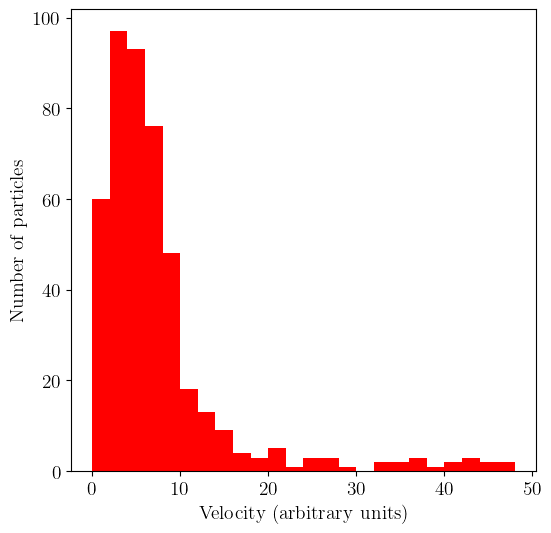

In [135]:
velocity_plotter(vx, vy)